#### Assignment 6: Convolutional Neural Networks(CNN)
NOTE : PLEASE DO NOT POST/SHARE THE CODE OR YOUR SOLUTIONS ON THE WEB/GIT except CANVAS FOR GRADING

References:
https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
https://www.tensorflow.org/tutorials/images/cnn
https://towardsdatascience.com/cnn-classification-a-cat-or-a-dog-568e6a135602
https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/


##### Submitting results into kaggle
https://www.kaggle.com/code/dansbecker/submitting-from-a-kernel/notebook

Description:
This assignment follows the same structure as Assignment 6. We will employ at least a 2x2 completely crossed experimental design. We will again use a simple training-and-test regimen. The factors in the design may include numbers of layers and/or nodes within layers, types of layers (convolutional or pooling), and/or other hyperparameters. You will utilize convolutional neural networks (CNNs) using keras/tensorflow. 

This week, you will work on the Leaf Classification Kaggle.com competition, https://www.kaggle.com/c/leaf-classification Specifically, you will build models using the training set to forecast the test set. T

Management Problem
Assume that we are providing advice to a website provider who is looking for tools to automatically label images provided by end users. As we look across the factors in the study, making recommendations to management about image classification, we are most concerned about achieving the highest possible accuracy in image classification. That is, we should be willing to sacrifice training time for model accuracy. What type of machine learning model works best? If it is a convolutional neural network, what type of network should we use? Part of this recommendation may concern information about the initial images themselves (input data for the classification task). What types of images work best?


Programming Resources
Géron, A. (2019). Hands-on machine learning with Scikit-Learn & TensorFlow: Concepts, tools, and techniques to build intelligent systems. hapter 14: Convolutional Neural Networks.Regarding memory issues. With the large number of parameters being fit in deep learning tasks, out-of-memory errors may be encountered on personal computers. 


Deliverables and File Formats
- Python notebook that address the problem and the writeup as indicated towards the end of this notebook (Audience:Director Data Science/Analytics)

Optional (Audience:Business/C-Suite) - Additional 20 points
1. Provide a double-spaced paper with a two-page maximum for the text. The paper in pdf format should include 
    (1) Summary and problem definition for management; 
    (2) Discussion of the methodology, data findings and traditional machine learning methods employed; 
    (3) List assumptions, programming work, issues along with model evaluation metrics; and 
    (4) Review of results/ insight swith recommendations for management.

Formatting Python Code
Refer to Google’s Python Style Guide (https://google.github.iostyleguide/pyguide.html) for ideas about formatting Python code:


NOTE : 
- Below is the starter code and please feel free to update/edit/change to provide your thoughts/solutions to the problem. 
- Comment often and in detail, highlighting major sections of code, describing the thinking behind the programming methods being employed.
- This code might have a lot of errors so please make sure to updated all the cells based on best practices along with your analysis/findings.


GRADING GUIDELINES (100 points)
--------------------------------
(1) Data preparation, exploration, visualization (20 points)
(2) Review research design and modeling methods (20 points)
(3) Review results, evaluate models (20 points)
(4) Implementation and programming (20 points)
(5) Exposition, problem description, and management recommendations (20 points) 

The objective of this playground competition is to use binary leaf images and extracted features, including shape, margin & texture, to accurately identify 99 species of plants. Leaves, due to their volume, prevalence, and unique characteristics, are an effective means of differentiating plant species. They also provide a fun introduction to applying techniques that involve image-based features.

As a first step, try building a classifier that uses the provided pre-extracted features. Next, try creating a set of your own features. Finally, examine the errors you're making and see what you can do to improve.


#### Data Description<font>
The dataset is available on the Kaggle website, and it is sourced from UCI Machine Learning Repository. This dataset was created by Pedro F. B. Silva and AndrÃ© R. S. MarÃ§al using leaf specimens collected by Rubim Almeida da Silva at the Faculty of Science, University of Porto, Portugal. The dataset consists approximately 1,500 images of leaf specimens (16 samples each of 99 species) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.

Both train.csv and test.csv datasets can be found here: https://www.kaggle.com/c/leaf-classification/data
The training set consists of N = 990 samples. For each sample, we have a binary image of the leaf of variable size and an d-dimensional feature vectors, where d = 192.
    
    
The objective of this playground competition is to use binary leaf images and extracted features, including shape, margin & texture, to accurately identify 99 species of plants. Leaves, due to their volume, prevalence, and unique characteristics, are an effective means of differentiating plant species. They also provide a fun introduction to applying techniques that involve image-based features.

As a first step, try building a classifier that uses the provided pre-extracted features. Next, try creating a set of your own features. Finally, examine the errors you're making and see what you can do to improve.

In [1]:
#!pip install mglearn

In [2]:
#Ignore Warning
import warnings
warnings.filterwarnings("ignore") 
# set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Run SetUp Script to Install Packages 
#General purpose imports here
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import re # regular expressions
import scipy
import sys
import os # Operation System
import seaborn as sns  # pretty plotting, including heat map
from timeit import default_timer as timer
from datetime import timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

from matplotlib.backends.backend_pdf import PdfPages
import sklearn
import tensorflow as tf
from datetime import datetime
from __future__ import division, print_function, unicode_literals
#These below are used in image processing
import cv2
import zipfile
from PIL import Image
from skimage.transform import resize, rotate, SimilarityTransform, warp
from skimage.filters import sobel
import glob

#Keras/tensorflow convolutional neural network specific imports here
import tensorflow as tf
from tensorflow import keras

#Below used for TensorBoard data Visualization
#from time import time
#from keras.callbacks import TensorBoard
# Python ≥3.5 is required
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# #Establish working directory
# #os.getcwd()
# #Mount Google Drive to Colab Enviorment
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/My Drive/Module 6/Assignment/
# !pwd
# #!ls
# print('Working Directory')
# print(os.getcwd())
# work_dir = "/content/gdrive/My Drive/Module 6/Assignment/"

In [5]:
df_train = pd.read_csv("train.csv")

#Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#and the data types for each variable
df_train.info()

# Use the head() method to inspect the first five (or more) rows of the data
df_train.head()

# shape of leaf train Dataset
print('Shape of Leaf train dataset',df_train.shape)

# Summary Statistics of leaf Dataset
df_train.describe().transpose()

df_train.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


Shape of Leaf train dataset (990, 194)


,count,mean,std,min,25%,50%,75%,max
id,990.0,799.595960,452.477568,1.0,415.250000,802.500000,1195.500000,1584.000000
margin1,990.0,0.017412,0.019739,0.0,0.001953,0.009766,0.025391,0.087891
margin2,990.0,0.028539,0.038855,0.0,0.001953,0.011719,0.041016,0.205080
margin3,990.0,0.031988,0.025847,0.0,0.013672,0.025391,0.044922,0.156250
margin4,990.0,0.023280,0.028411,0.0,0.005859,0.013672,0.029297,0.169920
...,...,...,...,...,...,...,...,...
texture60,990.0,0.014017,0.060151,0.0,0.000000,0.000000,0.000000,0.578130
texture61,990.0,0.002688,0.011415,0.0,0.000000,0.000000,0.000000,0.151370
texture62,990.0,0.020291,0.039040,0.0,0.000000,0.003906,0.023438,0.375980
texture63,990.0,0.008989,0.013791,0.0,0.000000,0.002930,0.012695,0.086914


Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [6]:
df_test = pd.read_csv("test.csv")

#Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#and the data types for each variable
df_test.info()

# Use the head() method to inspect the first five (or more) rows of the data
df_test.head()

# shape of leaf test Dataset
print('Shape of Leaf test dataset',df_test.shape)

# Summary Statistics of leaf Dataset
df_test.describe().transpose()

df_test.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


Shape of Leaf test dataset (594, 193)


,count,mean,std,min,25%,50%,75%,max
id,594.0,780.673401,465.646977,4.0,368.500000,774.000000,1184.500000,1583.000000
margin1,594.0,0.017562,0.019585,0.0,0.001953,0.009766,0.028809,0.085938
margin2,594.0,0.028425,0.038351,0.0,0.001953,0.010743,0.041016,0.189450
margin3,594.0,0.031858,0.025719,0.0,0.013672,0.023438,0.042969,0.167970
margin4,594.0,0.022556,0.028797,0.0,0.005859,0.013672,0.027344,0.164060
...,...,...,...,...,...,...,...,...
texture60,594.0,0.011217,0.052530,0.0,0.000000,0.000000,0.000000,0.606450
texture61,594.0,0.002617,0.011204,0.0,0.000000,0.000000,0.000000,0.123050
texture62,594.0,0.019975,0.034704,0.0,0.000000,0.003418,0.022461,0.247070
texture63,594.0,0.009389,0.013457,0.0,0.000000,0.002930,0.014648,0.086914


Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)

The dataset is composed of a combination of 990 observations and 194 features in train dataset and 594 observations and 193 features in test dataset . All of the features are continous (float64) and ID is numerical(int64).The species feature is only present in train dataset. There are no missing values (Nan) but we can validate it again with null check.

In [7]:
# Checking for Missing values in train dataset
print('Missing value in Leaf train data: ',df_train.isnull().sum().sum())

# Checking for duplicates in train dataset
print('Duplicates in Leaf train data: ',df_train.duplicated().sum())

Missing value in Leaf train data:  0
Duplicates in Leaf train data:  0


In [8]:
# Checking for Missing values in test dataset
print('Missing value in Leaf test data: ',df_test.isnull().sum().sum())

# Checking for duplicates in test dataset
print('Duplicates in Leaf test data: ',df_test.duplicated().sum())

Missing value in Leaf test data:  0
Duplicates in Leaf test data:  0


In [9]:
# Inspect class balances for train set.
print(df_train['species'].value_counts(ascending=False))
print(df_train['species'].value_counts(normalize=True))

Tilia_Oliveri             10
Quercus_Coccifera         10
Quercus_Greggii           10
Acer_Capillipes           10
Acer_Platanoids           10
                          ..
Lithocarpus_Edulis        10
Quercus_Phillyraeoides    10
Alnus_Maximowiczii        10
Acer_Opalus               10
Acer_Pictum               10
Name: species, Length: 99, dtype: int64
Tilia_Oliveri             0.010101
Quercus_Coccifera         0.010101
Quercus_Greggii           0.010101
Acer_Capillipes           0.010101
Acer_Platanoids           0.010101
                            ...   
Lithocarpus_Edulis        0.010101
Quercus_Phillyraeoides    0.010101
Alnus_Maximowiczii        0.010101
Acer_Opalus               0.010101
Acer_Pictum               0.010101
Name: species, Length: 99, dtype: float64


([<matplotlib.patches.Wedge at 0x2be3c30a640>,
 [Text(-0.034900726815381526, 1.099446196622535, ''),
  Text(-0.10456164753751467, 1.0950191148396637, ''),
  Text(-0.17380153541018017, 1.0861827775697164, ''),
  Text(-0.2423415858432209, 1.0729727656240828, ''),
  Text(-0.3099058122448406, 1.0554422710583775, ''),
  Text(-0.37622215732219927, 1.0336618829868065, ''),
  Text(-0.4410235885601086, 1.0077193033447183, ''),
  Text(-0.5040491734667203, 0.9777189937438652, ''),
  Text(-0.5650451302565758, 0.9437817548423626, ''),
  Text(-0.623765849740282, 0.9060442399230758, ''),
  Text(-0.6799748843060313, 0.8646584046390804, ''),
  Text(-0.7334459000106762, 0.8197908951418827, ''),
  Text(-0.7839635879466379, 0.7716223770561831, ''),
  Text(-0.8313245312148794, 0.7203468080031737, ''),
  Text(-0.875338024012965, 0.6661706566016533, ''),
  Text(-0.9158268395400145, 0.6093120710917752, ''),
  Text(-0.9526279436264792, 0.5500000009290781, ''),
  Text(-0.9855931512151993, 0.48847327488583586, '

Text(0.5, 1.0, 'Leaf Species Distribution')

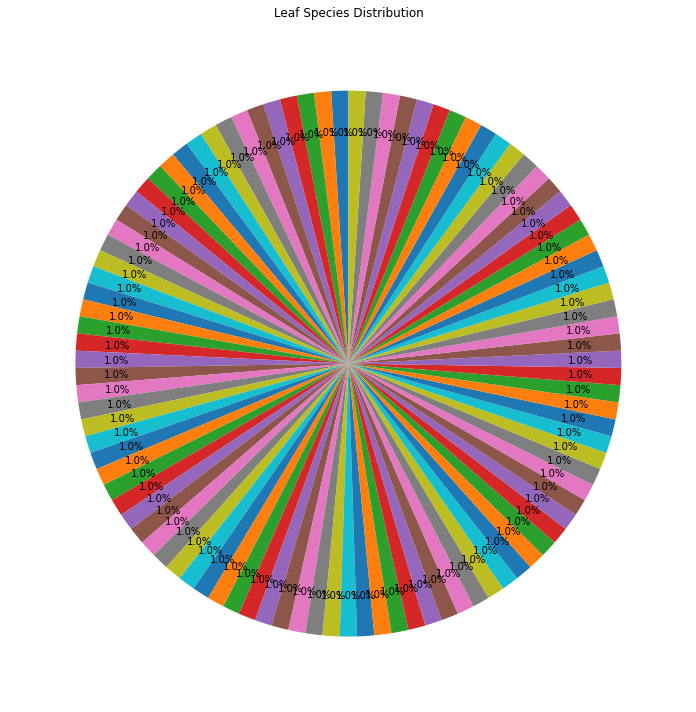

In [10]:
values = df_train['species'].value_counts().sort_values(ascending = True)
colors = sns.color_palette()

#create pie chart to see the distribution of label variable of interest
plt.pie(values, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

#draw circle
#centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
#fig.gca().add_artist(centre_circle)
fig.set_size_inches(10,10)
# Equal aspect ratio ensures that pie is drawn as a circle 
plt.title("Leaf Species Distribution") 
plt.tight_layout()
plt.show()

The distribution is balanced among all 99 species.

<Figure size 1440x1080 with 0 Axes>

1141.jpg


<AxesSubplot:>

1350.jpg


<AxesSubplot:>

1001.jpg


<AxesSubplot:>

1148.jpg


<AxesSubplot:>

142.jpg


<AxesSubplot:>

110.jpg


<AxesSubplot:>

1224.jpg


<AxesSubplot:>

1457.jpg


<AxesSubplot:>

1420.jpg


<AxesSubplot:>

1402.jpg


<AxesSubplot:>

1154.jpg


<AxesSubplot:>

1474.jpg


<AxesSubplot:>

1411.jpg


<AxesSubplot:>

1258.jpg


<AxesSubplot:>

1451.jpg


<AxesSubplot:>

1330.jpg


<AxesSubplot:>

132.jpg


<AxesSubplot:>

1276.jpg


<AxesSubplot:>

1137.jpg


<AxesSubplot:>

1483.jpg


<AxesSubplot:>

1113.jpg


<AxesSubplot:>

1474.jpg


<AxesSubplot:>

1231.jpg


<AxesSubplot:>

1460.jpg


<AxesSubplot:>

1123.jpg


<AxesSubplot:>

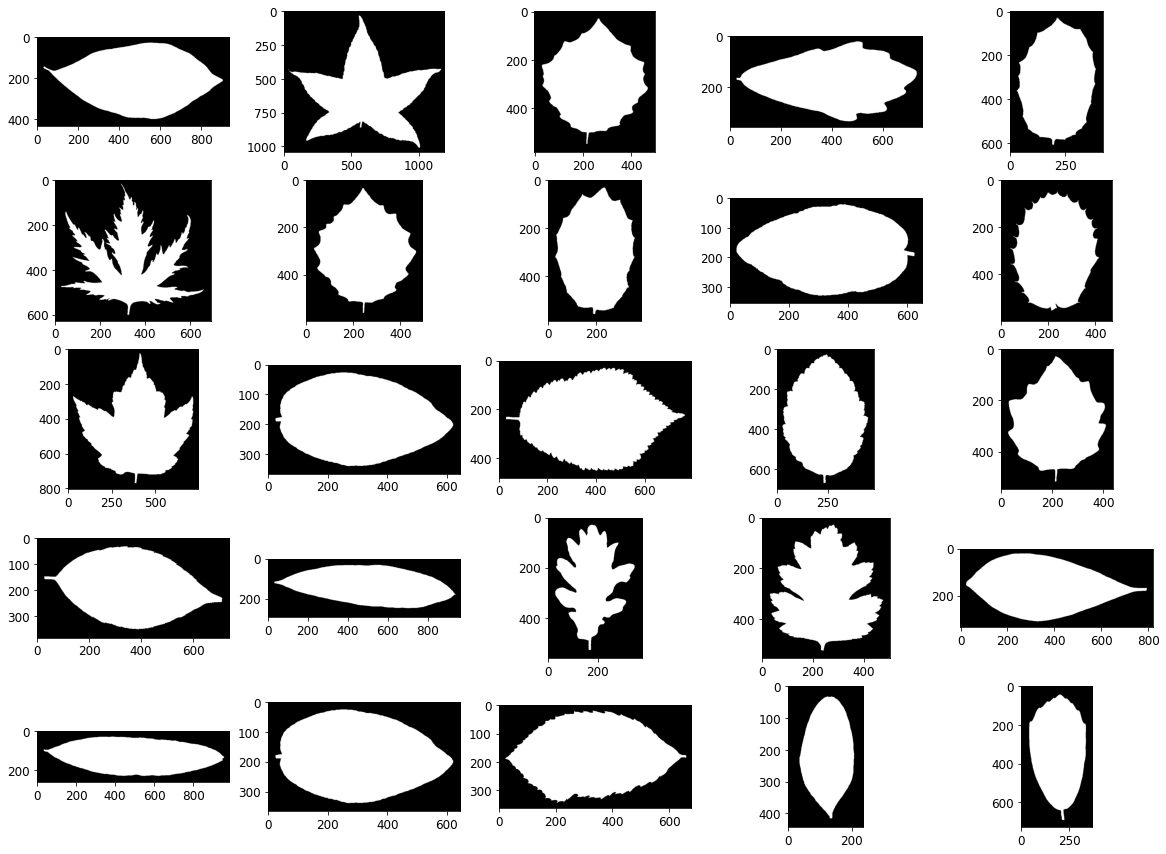

In [11]:
#visualize the images in image folder to see different orientation.
plt.figure(figsize=(20,15))
for i in range(25):
    j=np.random.choice((os.listdir(r"C:\Users\Nick's Laptop\Desktop\Machine Learning & Predictive Analytics\assignment6_imageProcessingwithCNN/images")))
    print(j)
    plt.subplot(5,5,i+1)
    img=keras.preprocessing.image.load_img(os.path.join(r"C:\Users\Nick's Laptop\Desktop\Machine Learning & Predictive Analytics\assignment6_imageProcessingwithCNN/images",j))
    plt.imshow(img)

######   Based on the images, we may need image augmentation such as horizontal and vertical flip and rotation to drive accuracy.

In [12]:
img_rows, img_cols = 64, 64 #96,96 #40, 40 (we will go with 64 width and height as each feature is a 64-attribute vector per leaf sample.

train_images = np.zeros((df_train.shape[0], img_rows, img_cols))
for i in range(df_train.shape[0]):
    image = cv2.imread(r"C:\Users\Nick's Laptop\Desktop\Machine Learning & Predictive Analytics\assignment6_imageProcessingwithCNN/images" + str(df_train.id.iloc[i])+'.jpg', cv2.IMREAD_GRAYSCALE)
    if image is None:
        continue
    rimage = cv2.resize(image, (img_rows, img_cols))
    rimage = rimage/255.0 #Pixel value regularization done here
    #train_images[i] = rimage
    train_images[i] = sobel(rimage) # Sobel filter on an image to detect edges
       
test_images = np.zeros((df_test.shape[0], img_rows, img_cols))
for i in range(df_test.shape[0]):
    image = cv2.imread(r"C:\Users\Nick's Laptop\Desktop\Machine Learning & Predictive Analytics\assignment6_imageProcessingwithCNN/images" + str(df_test.id.iloc[i])+'.jpg',cv2.IMREAD_GRAYSCALE)
    if image is None:
        continue
    rimage = cv2.resize(image, (img_rows, img_cols))
    rimage = rimage/255.0
    test_images[i] = sobel(rimage) #Sobel filter on an image to detect edges

print('Train images shape: {}'.format(train_images.shape)) # 990
print('Test images shape: {}'.format(test_images.shape)) # 594

Train images shape: (990, 64, 64)
Test images shape: (594, 64, 64)


In [13]:
train_Id = df_train['id']
df_train_new = df_train.drop('id',1)
target =  df_train_new["species"]
df_train_new = df_train_new.drop('species',1)
df_train_new.shape

(990, 192)

In [14]:

target.shape
target.head()

(990,)

0              Acer_Opalus
1    Pterocarya_Stenoptera
2     Quercus_Hartwissiana
3          Tilia_Tomentosa
4       Quercus_Variabilis
Name: species, dtype: object

In [15]:
# Since the labels are textual, so we encode them categorically
le = LabelEncoder()
encoded_target= le.fit_transform(target)
feature_train = StandardScaler().fit(df_train_new).transform(df_train_new)

In [16]:
encoded_target
feature_train

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

array([[-0.48661074, -0.13135701, -0.33095592, ..., -0.39487147,
        -0.65214311,  0.26239707],
       [-0.58560191, -0.73488047, -0.02856115, ..., -0.49497401,
         2.18166976,  0.13364087],
       [-0.58560191, -0.48340807, -0.48219201, ..., -0.52001246,
         0.83564129, -0.72463124],
       ...,
       [-0.78358426, -0.63430181, -1.23821765, ...,  0.1807566 ,
        -0.65214311, -0.76756462],
       [-0.88257543, -0.73488047,  0.5762671 , ..., -0.52001246,
        -0.51045972, -0.72463124],
       [ 0.30542003, -0.23196142, -0.02856115, ...,  0.08065405,
         1.18988604,  0.13364087]])

In [17]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

def dist_plot(var1, var2, var3):
    plt.figure(figsize=(10,10))
    tmp_plt=sns.countplot(var1, palette="Blues").set_title(var2)
    tmp_fig = tmp_plt.get_figure()
    tmp_fig.savefig(var3 + ".png", 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.5)
    return(tmp_plt)
    
#Tensorboard Logs
root_logdir = os.path.join(os.curdir, "tf_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

### <font color=CornflowerBlue>Train and test split<font>

In [18]:
# Split the train and the validation set for the fitting 
X_train, X_val, y_train, y_val = train_test_split(train_images, encoded_target, test_size = 0.3, shuffle=True, stratify=encoded_target, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((693, 64, 64), (297, 64, 64), (693,), (297,))

In [19]:
# stratified randomized folds for cross validation.
sss = StratifiedShuffleSplit(10, test_size=0.2, random_state=42)
train_i,val_i = next(sss.split(feature_train,encoded_target))

features_val,val_img,val_target = feature_train[val_i],train_images[val_i], encoded_target[val_i]
features_train,train_img,train_target = feature_train[train_i],train_images[train_i],encoded_target[train_i]

In [20]:
# # reshape dataset to have a single channel
train_img = train_img.reshape(train_img.shape[0], img_rows, img_cols, 1) # 792
val_img = val_img.reshape(val_img.shape[0], img_rows, img_cols, 1) # 198
features_train = features_train.reshape(features_train.shape[0],features_train.shape[1],1)
features_val = features_val.reshape(features_val.shape[0],features_val.shape[1],1)
#X_test = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
#print(X_train.shape, X_val.shape, X_test.shape)

In [21]:
# # reshape dataset to have a single channel
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) # 792
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1) # 198
X_test = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(X_train.shape, X_val.shape, X_test.shape)

(693, 64, 64, 1) (297, 64, 64, 1) (594, 64, 64, 1)


In [22]:
nb_classes = np.unique(df_train.species).size
nb_classes

99

In [23]:
# one hot encode target values (convert class vectors to binary class matrices), num_classes will take max(y) + 1 i.e. 10 digits
nb_classes = np.unique(y_train).size
y_train = keras.utils.to_categorical(y_train, nb_classes)
y_val = keras.utils.to_categorical(y_val, nb_classes)

In [24]:
# one hot encode target values (convert class vectors to binary class matrices), num_classes will take max(y) + 1 i.e. 10 digits
nb_classes = np.unique(train_target).size
train_target = keras.utils.to_categorical(train_target, nb_classes)
val_target = keras.utils.to_categorical(val_target, nb_classes)

In [25]:
val_target.shape

(198, 99)

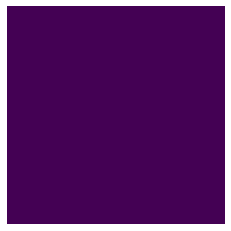

In [26]:
plot_color_image(X_train[0,:,:,0])

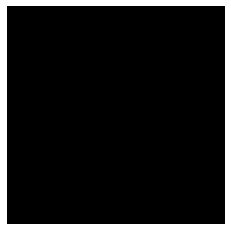

In [27]:
plot_image(X_train[0,:,:,0])

In [28]:
# Image batch generator
def imageGenerator(X, y, batch_size):
    img_rows, img_cols = X.shape[1], X.shape[2]
    resc = 0.02
    rot = 5
    transl = 0.01*img_rows
    while 1: # Infinite loop
        batchX = np.zeros((batch_size, img_rows, img_cols, 1))
        # batch_size random indices over train images
        batch_ids = np.random.choice(X.shape[0], batch_size)
        for j in range(batch_ids.shape[0]): # Loop over random images
            # Rotate around center
            imagej = rotate(X[batch_ids[j]], angle =rot*np.random.randn())
            # Rescale and translate
            tf = SimilarityTransform(scale = 1 + resc*np.random.randn(1,2)[0],
                                translation = transl*np.random.randn(1,2)[0]) 
            batchX[j] = warp(imagej, tf)
        yield (batchX, y[batch_ids])
        

### <font color=CornflowerBlue>CNN (Keras API)<font>

In [29]:
# Learning curve function to visualize accuracy and loss in train and validation set.
def draw_learning_curve(history, keys=['accuracy', 'loss']):
    plt.figure(figsize=(20,8))
    for i, key in enumerate(keys):
        plt.subplot(1, 2, i + 1)
        sns.lineplot(x = history.epoch, y = history.history[key])
        sns.lineplot(x = history.epoch, y = history.history['val_' + key])
        plt.title('Learning Curve')
        plt.ylabel(key.title())
        plt.grid(True)
        #plt.gca().set_ylim(0, 1)
        plt.xlabel('Epoch')
        plt.legend(['train', 'test'], loc='best')
    plt.show()

In [30]:
#CNN Model with one input i.e. preprocessed images.
def generateModel():
    #input layer - note the 1 is because of greyscaling, it would be a 3 if colored images were being used
    input_layer = keras.layers.Input(shape = (img_rows, img_cols, 1))
    
    filterSize = 32
    conv1 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='same')(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.Activation("relu")(conv1)
    conv1 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='same')(conv1)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.Activation("relu")(conv1)

    maxPool1 = keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(conv1)
    
    filterSize = 64
    conv2 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='same')(maxPool1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.Activation("relu")(conv2)
    conv2 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='same')(conv2)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.Activation("relu")(conv2)
    
    maxPool2 = keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(conv2)
    
    filterSize = 128
    conv3 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='same')(maxPool2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.Activation("relu")(conv3)
    conv3 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='same')(maxPool2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.Activation("relu")(conv3)
    
    outputStem = keras.layers.AveragePooling2D(pool_size=(3,3), strides=(1,1), padding='same')(conv3)
    outputStem = keras.layers.Flatten()(outputStem)
    
    #Note that the final layer is always dense, and because this is a categorization problem, the activation function is
    #softmax
    outputStem = keras.layers.Dense(nb_classes, activation='softmax')(outputStem)
    
    #This final step is specific to the Keras API method, where the tensor representation is converted to a model
    model = keras.Model(inputs = input_layer, outputs = outputStem)
    return model

In [31]:
model1 = generateModel()
print(model1.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                             

In [32]:
#Reset Log Directory for tensorslow
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint(r"C:\Users\Nick's Laptop\Desktop\Machine Learning & Predictive Analytics\assignment6_imageProcessingwithCNN"+"tmp/my_keras_model.h5", save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(monitor='loss', mode ='min', min_delta=1, patience=10)

In [33]:
learningRate = .001
epochs = 10
n_extension = 10
batchSize = 32
steps_per_epoch = X_train.shape[0]/2
start = timer()

#model 1 with pre processed images
model1.compile(keras.optimizers.Adam(lr=learningRate),metrics=["accuracy"],loss="categorical_crossentropy")
history1 = model1.fit(imageGenerator(X_train, y_train, batchSize), validation_data=(X_val, y_val), epochs= 5, 
                    steps_per_epoch=steps_per_epoch, callbacks=[checkpoint_cb, tensorboard_cb, early_stopping_cb])

#final validation loss and accuracy
final_loss1, final_acc1 = model1.evaluate(X_val, y_val, verbose=1)
end = timer()
#total time taken by model1
elapsed_time1 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for model1".format(final_loss1, final_acc1*100))
print("Model 1 with pre processed image training time in seconds", elapsed_time1)

Epoch 1/5
346/346 [==============================] - 94s 269ms/step - loss: 4.5952 - accuracy: 0.0100 - val_loss: 4.5953 - val_accuracy: 0.0101
Epoch 2/5
346/346 [==============================] - 94s 270ms/step - loss: 4.5954 - accuracy: 0.0088 - val_loss: 4.5953 - val_accuracy: 0.0101
Epoch 3/5
346/346 [==============================] - 94s 271ms/step - loss: 4.5951 - accuracy: 0.0091 - val_loss: 4.5955 - val_accuracy: 0.0101
Epoch 4/5
346/346 [==============================] - 93s 267ms/step - loss: 4.5954 - accuracy: 0.0118 - val_loss: 4.5955 - val_accuracy: 0.0101
Epoch 5/5
10/10 [==============================] - 1s 57ms/step - loss: 4.5955 - accuracy: 0.0101
Final loss: 4.595514, final accuracy: 1.010101 for model1
Model 1 with pre processed image training time in seconds 0:07:47.458082


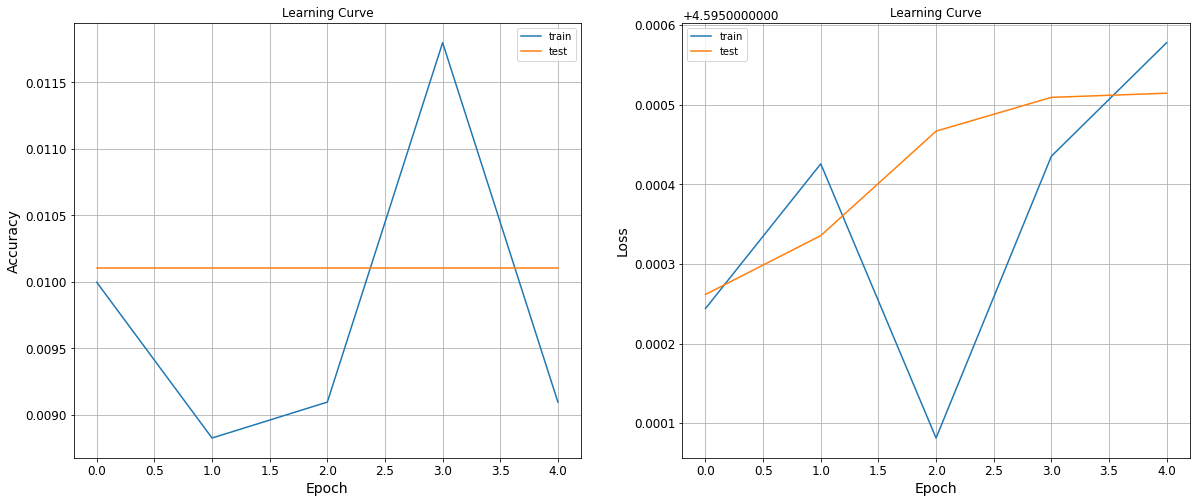

In [34]:
# Visualize learning curve for model 1 with pre processed images.
draw_learning_curve(history1)

In [35]:
#model 1 summarized results
train_loss1, train_acc1 = model1.evaluate(X_train, y_train)
Model1 = "CNN Model 1 (pre-processed features)"
results = pd.DataFrame(columns = ['Model', 'Time', 'Train-loss', 'Train-accuracy', 'Test-loss', 'Test-Accuracy'])
row1 = [Model1, elapsed_time1, train_loss1, train_acc1, final_loss1, final_acc1]
results = results.append(pd.DataFrame([row1], columns=results.columns), ignore_index=True)

22/22 [==============================] - 1s 62ms/step - loss: 4.5955 - accuracy: 0.0101


In [36]:
results

,Model,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
0,CNN Model 1 (pre-processed features),0 days 00:07:47.458082,4.595515,0.010101,4.595514,0.010101


In [37]:
# CNN Model with 2 input features combined (preprocessed feature using images and  pre-extracted numerical features)
def generateCombinedModel(learning_rate=0.001):

    Input_layer = keras.layers.Input(shape=(img_rows, img_cols, 1))

    first = keras.layers.Conv2D(64, kernel_size=(3,3), activation= "relu", padding= "same")(Input_layer)

    first = keras.layers.Conv2D(128, kernel_size=(3,3), activation = "relu")(first)

    first = keras.layers.Dropout(.5)(first)

    first = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(first)

    first = keras.layers.Flatten()(first)
    
    #second network only for the pre_extracted features

    Input_layer_features = keras.layers.Input(shape=(192,1),name='second')

    second = keras.layers.Dense(100, activation = "relu")(Input_layer_features)

    second = keras.layers.MaxPool1D()(second)

    second = keras.layers.Flatten()(second)

    combined = keras.layers.concatenate([first,second])
    type(combined)

    combined = keras.layers.Dense(100, activation= "relu")(combined)
    combined = keras.layers.Dropout(.5)(combined)
    #output layer
    output_layer = keras.layers.Dense(99, activation="softmax")(combined)
    optimizer = keras.optimizers.Adam(learning_rate)

    model = keras.Model(inputs=[Input_layer, Input_layer_features],outputs=output_layer)
    #"categorical_crossentropy" loss  as we have converted the labels to categorical. 
    # otherwise use "sparse_categorical_crossentropy" loss if we have sparse labels.
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [38]:
#Initiallize model 2
model2 = generateCombinedModel()
#print model 2 summary
print(model2.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 64, 64, 64)   640         ['input_2[0][0]']                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 62, 62, 128)  73856       ['conv2d_6[0][0]']               
                                                                                                  
 second (InputLayer)            [(None, 192, 1)]     0           []                               
                                                                                            

In [39]:
start = timer()

#model2 with combined features i.e. pre processed images and pre extracted features.
history2 = model2.fit([train_img, features_train], train_target, validation_data=([val_img, features_val], val_target), epochs= 100)
#final validation loss on model 2
final_loss2, final_acc2 = model2.evaluate([val_img, features_val], val_target, verbose=1)

end = timer()
#Total time taken by model 2
elapsed_time2 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for model2 with combined feature".format(final_loss2, final_acc2*100))
print("Model 2 with combined feature training time in seconds", elapsed_time2)

Epoch 1/100
25/25 [==============================] - 13s 520ms/step - loss: 4.4224 - accuracy: 0.0556 - val_loss: 3.8729 - val_accuracy: 0.2778
Epoch 2/100
25/25 [==============================] - 13s 515ms/step - loss: 3.5546 - accuracy: 0.1957 - val_loss: 2.8411 - val_accuracy: 0.4545
Epoch 3/100
25/25 [==============================] - 13s 521ms/step - loss: 2.8106 - accuracy: 0.3245 - val_loss: 1.9627 - val_accuracy: 0.6667
Epoch 4/100
25/25 [==============================] - 13s 519ms/step - loss: 2.0409 - accuracy: 0.4609 - val_loss: 1.2617 - val_accuracy: 0.7929
Epoch 5/100
25/25 [==============================] - 13s 519ms/step - loss: 1.6980 - accuracy: 0.5379 - val_loss: 0.9051 - val_accuracy: 0.8333
Epoch 6/100
25/25 [==============================] - 13s 523ms/step - loss: 1.3319 - accuracy: 0.6275 - val_loss: 0.6622 - val_accuracy: 0.8737
Epoch 7/100
25/25 [==============================] - 13s 520ms/step - loss: 1.1539 - accuracy: 0.6780 - val_loss: 0.5429 - val_accuracy:

25/25 [==============================] - 13s 507ms/step - loss: 0.1876 - accuracy: 0.9381 - val_loss: 0.1924 - val_accuracy: 0.9545
Epoch 58/100
25/25 [==============================] - 13s 504ms/step - loss: 0.1457 - accuracy: 0.9533 - val_loss: 0.1345 - val_accuracy: 0.9545
Epoch 59/100
25/25 [==============================] - 13s 502ms/step - loss: 0.1877 - accuracy: 0.9470 - val_loss: 0.1375 - val_accuracy: 0.9495
Epoch 60/100
25/25 [==============================] - 13s 506ms/step - loss: 0.1623 - accuracy: 0.9394 - val_loss: 0.1288 - val_accuracy: 0.9697
Epoch 61/100
25/25 [==============================] - 13s 502ms/step - loss: 0.1481 - accuracy: 0.9520 - val_loss: 0.1592 - val_accuracy: 0.9545
Epoch 62/100
25/25 [==============================] - 12s 500ms/step - loss: 0.1375 - accuracy: 0.9583 - val_loss: 0.1601 - val_accuracy: 0.9596
Epoch 63/100
25/25 [==============================] - 12s 500ms/step - loss: 0.1474 - accuracy: 0.9508 - val_loss: 0.1168 - val_accuracy: 0.964

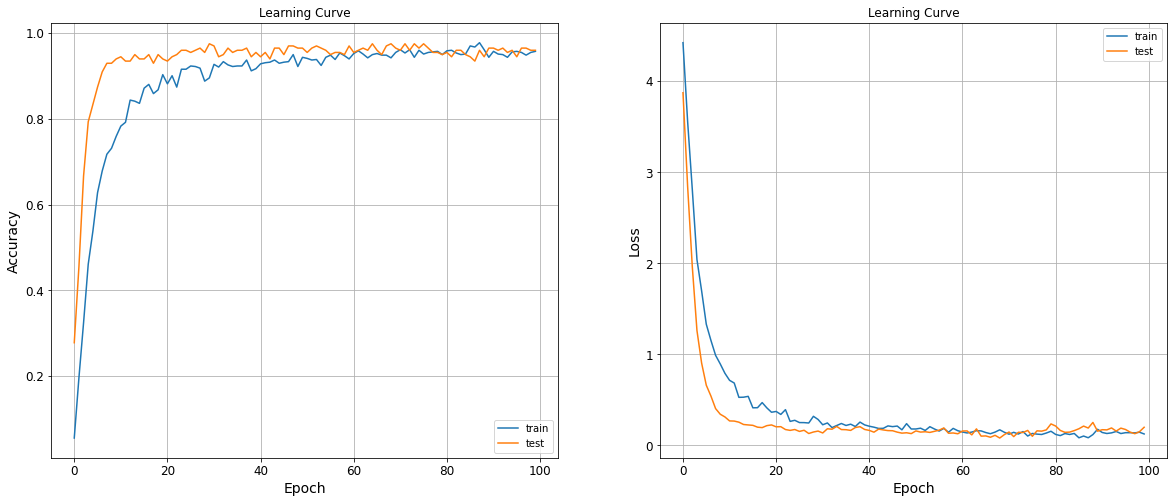

In [40]:
#Visualize learning curve for model 2
draw_learning_curve(history2)

In [41]:
#Summarize Model 2 results
train_loss2, train_acc2 = model2.evaluate([train_img, features_train], train_target)
Model2 = "CNN Model 2 (Combined Features)"
row2 = [Model2, elapsed_time2, train_loss2, train_acc2, final_loss2, final_acc2]
results = results.append(pd.DataFrame([row2], columns=results.columns), ignore_index=True)

25/25 [==============================] - 2s 90ms/step - loss: 1.3695e-04 - accuracy: 1.0000


In [42]:
results

,Model,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
0,CNN Model 1 (pre-processed features),0 days 00:07:47.458082,4.595515,0.010101,4.595514,0.010101
1,CNN Model 2 (Combined Features),0 days 00:58:27.762656,0.000137,1.000000,0.200161,0.959596


In [43]:
#intiallize Model 3
model3 = generateCombinedModel()
#Print model summary
print(model3.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 64, 64, 64)   640         ['input_3[0][0]']                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 62, 62, 128)  73856       ['conv2d_8[0][0]']               
                                                                                                  
 second (InputLayer)            [(None, 192, 1)]     0           []                               
                                                                                            

In [44]:
start = timer()

#Data Augmentation using keras image preprocessing library
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    zca_whitening=True,
    fill_mode='nearest')

#fit image data generator
datagen.fit(train_img)

STEP_SIZE_TRAIN=train_img.shape[0]//32
STEP_SIZE_VALID=val_img.shape[0]//16

# fits the model on batches with real-time data augmentation and combined feature set.
history3 = model3.fit(datagen.flow([train_img, features_train], train_target, batch_size=32),
                     steps_per_epoch=STEP_SIZE_TRAIN, 
                     validation_data = ([val_img, features_val], val_target),
                     epochs=30, 
                     callbacks=[checkpoint_cb, tensorboard_cb, early_stopping_cb])
#Final validation loss and accuracy for model 3
final_loss3, final_acc3 = model3.evaluate([val_img, features_val], val_target, verbose=1)
end = timer()
#total time taken for training model3
elapsed_time3 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for Model 3 with combined features and data augmentation".format(final_loss3, final_acc3*100))
print("Model 3 with combined features and data augmentation training time in seconds", elapsed_time3)

Epoch 1/30
24/24 [==============================] - 15s 587ms/step - loss: 4.4632 - accuracy: 0.0447 - val_loss: 4.0028 - val_accuracy: 0.1616
Epoch 2/30
24/24 [==============================] - 14s 592ms/step - loss: 3.7193 - accuracy: 0.1474 - val_loss: 3.0060 - val_accuracy: 0.3889
Epoch 3/30
24/24 [==============================] - 14s 594ms/step - loss: 2.9106 - accuracy: 0.2776 - val_loss: 2.0660 - val_accuracy: 0.6869
Epoch 4/30
24/24 [==============================] - 14s 589ms/step - loss: 2.2053 - accuracy: 0.4395 - val_loss: 1.3318 - val_accuracy: 0.7929
Epoch 5/30
24/24 [==============================] - 14s 591ms/step - loss: 1.7055 - accuracy: 0.5671 - val_loss: 0.9152 - val_accuracy: 0.8737
Epoch 6/30
24/24 [==============================] - 15s 603ms/step - loss: 1.3500 - accuracy: 0.6315 - val_loss: 0.6805 - val_accuracy: 0.8889
Epoch 7/30
24/24 [==============================] - 14s 590ms/step - loss: 1.0711 - accuracy: 0.7132 - val_loss: 0.4891 - val_accuracy: 0.9192

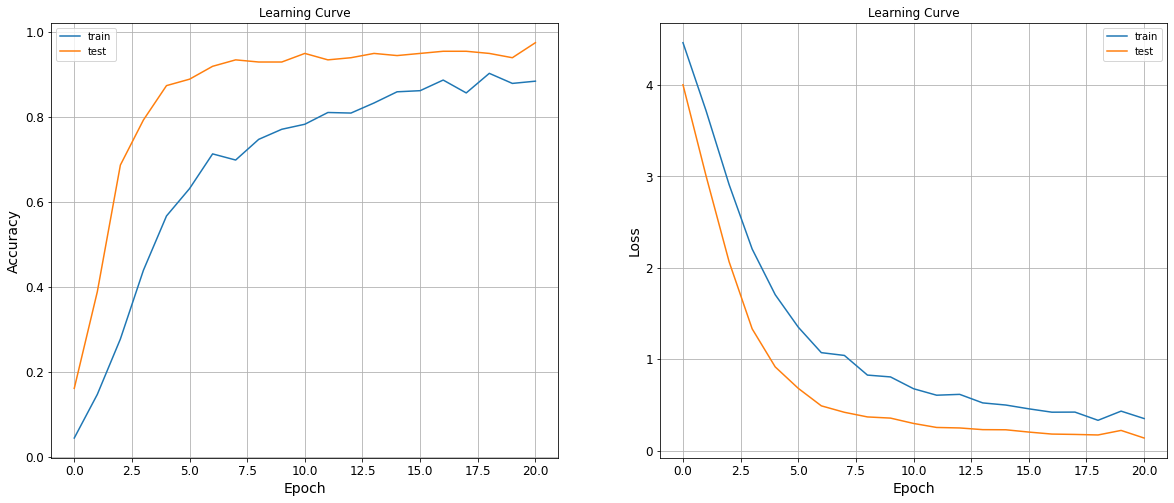

In [45]:
#Visualize learning curve
draw_learning_curve(history3)

In [46]:
#Summarize model 3 results
train_loss3, train_acc3 = model3.evaluate([train_img, features_train], train_target)
Model3 = "CNN Model 3 (Combined augmented features)"
row3 = [Model3, elapsed_time3, train_loss3, train_acc3, final_loss3, final_acc3]
results = results.append(pd.DataFrame([row3], columns=results.columns), ignore_index=True)

25/25 [==============================] - 2s 90ms/step - loss: 0.0099 - accuracy: 1.0000


In [47]:
results

,Model,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
0,CNN Model 1 (pre-processed features),0 days 00:07:47.458082,4.595515,0.010101,4.595514,0.010101
1,CNN Model 2 (Combined Features),0 days 00:58:27.762656,0.000137,1.000000,0.200161,0.959596
2,CNN Model 3 (Combined augmented features),0 days 00:13:02.141028,0.009873,1.000000,0.136852,0.974747


## Addition of a new model with the following parameter adjustments:

### Adjust learning rate to 0.002, include beta values, epsilon and amsgrad for the Adam optimizer 

### Adjust second layer activation to tanh

Additional resources stem from various examples from kaggle. I attempted to employ best practices from a number of different examples

In [48]:
# CNN Model with adjusted parameters 
# Adjust learning rate to 0.002, include beta values, epsilon and amsgrad 
def generateCombinedModelNick(learning_rate=0.001, beta_1=0.96, beta_2=0.999, epsilon=1e-07, amsgrad=False):

    Input_layer = keras.layers.Input(shape=(img_rows, img_cols, 1))

    first = keras.layers.Conv2D(64, kernel_size=(3,3), activation= "relu", padding= "same")(Input_layer)

    first = keras.layers.Conv2D(128, kernel_size=(3,3), activation = "relu")(first)

    first = keras.layers.Dropout(.5)(first)

    first = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(first)

    first = keras.layers.Flatten()(first)
    
    #second network only for the pre_extracted features

    Input_layer_features = keras.layers.Input(shape=(192,1),name='second')
    # Adjust second layer activation to tanh
    second = keras.layers.Dense(1024, activation = "tanh")(Input_layer_features)

    second = keras.layers.MaxPool1D()(second)

    second = keras.layers.Flatten()(second)

    combined = keras.layers.concatenate([first,second])
    type(combined)

    combined = keras.layers.Dense(100, activation= "relu")(combined)
    combined = keras.layers.Dropout(.5)(combined)
    #output layer
    output_layer = keras.layers.Dense(99, activation="softmax")(combined)
    optimizer = keras.optimizers.Adam(learning_rate, beta_1, beta_2, epsilon, amsgrad)
    # Include additional optimizer components for Adam 
    model = keras.Model(inputs=[Input_layer, Input_layer_features],outputs=output_layer)
    #"categorical_crossentropy" loss  as we have converted the labels to categorical. 
    # otherwise use "sparse_categorical_crossentropy" loss if we have sparse labels.
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [49]:
#Initiallize model 4
model4 = generateCombinedModelNick()
#print model 4 summary
print(model4.summary())

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 64, 64, 64)   640         ['input_4[0][0]']                
                                                                                                  
 conv2d_11 (Conv2D)             (None, 62, 62, 128)  73856       ['conv2d_10[0][0]']              
                                                                                                  
 second (InputLayer)            [(None, 192, 1)]     0           []                               
                                                                                            

### Number of Epochs adjusted to 50

In [50]:
# Adjust number of Epochs to 50
start = timer()

#model2 with combined features i.e. pre processed images and pre extracted features.
history4 = model4.fit([train_img, features_train], train_target, validation_data=([val_img, features_val], val_target), epochs= 50)
#final validation loss on model 2
final_loss4, final_acc4 = model4.evaluate([val_img, features_val], val_target, verbose=1)

end = timer()
#Total time taken by model 2
elapsed_time4 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for model4 with combined feature".format(final_loss4, final_acc4*100))
print("Model 2 with combined feature training time in seconds", elapsed_time4)

Epoch 1/50
25/25 [==============================] - 14s 563ms/step - loss: 4.3130 - accuracy: 0.0909 - val_loss: 3.0489 - val_accuracy: 0.4394
Epoch 2/50
25/25 [==============================] - 14s 565ms/step - loss: 2.7887 - accuracy: 0.3119 - val_loss: 1.4068 - val_accuracy: 0.7071
Epoch 3/50
25/25 [==============================] - 14s 568ms/step - loss: 1.5620 - accuracy: 0.5859 - val_loss: 0.6285 - val_accuracy: 0.8737
Epoch 4/50
25/25 [==============================] - 14s 570ms/step - loss: 1.1398 - accuracy: 0.6818 - val_loss: 0.4439 - val_accuracy: 0.9091
Epoch 5/50
25/25 [==============================] - 14s 571ms/step - loss: 0.8931 - accuracy: 0.7475 - val_loss: 0.2855 - val_accuracy: 0.9394
Epoch 6/50
25/25 [==============================] - 15s 588ms/step - loss: 0.7553 - accuracy: 0.7778 - val_loss: 0.2736 - val_accuracy: 0.9242
Epoch 7/50
25/25 [==============================] - 14s 567ms/step - loss: 0.5791 - accuracy: 0.8359 - val_loss: 0.2749 - val_accuracy: 0.9495

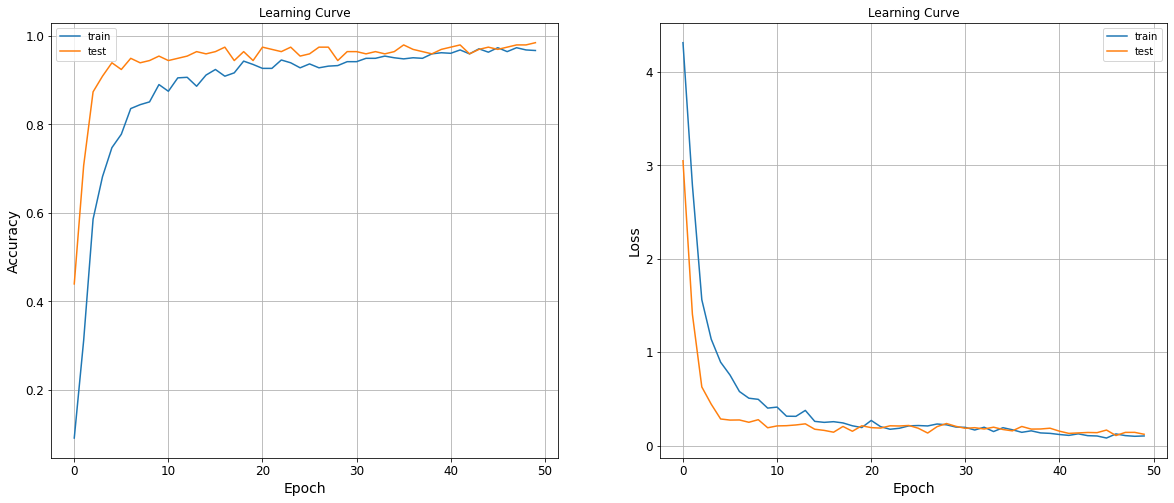

In [51]:
#Visualize learning curve
draw_learning_curve(history4)

In [52]:
#Summarize model 4 results
train_loss4, train_acc4 = model4.evaluate([train_img, features_train], train_target)
Model4 = "CNN Model 4 (Combined features with adjusted parameters)"
row4 = [Model4, elapsed_time4, train_loss4, train_acc4, final_loss4, final_acc4]
results = results.append(pd.DataFrame([row4], columns=results.columns), ignore_index=True)

25/25 [==============================] - 3s 106ms/step - loss: 4.4221e-05 - accuracy: 1.0000


In [53]:
results

,Model,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
0,CNN Model 1 (pre-processed features),0 days 00:07:47.458082,4.595515,0.010101,4.595514,0.010101
1,CNN Model 2 (Combined Features),0 days 00:58:27.762656,0.000137,1.000000,0.200161,0.959596
2,CNN Model 3 (Combined augmented features),0 days 00:13:02.141028,0.009873,1.000000,0.136852,0.974747
3,CNN Model 4 (Combined features with adjusted p...,0 days 00:11:55.753334,0.000044,1.000000,0.121783,0.984848


## Now I will include and augmented model using the adjusted parameters from my new combined features to see if scoring can be improved further 

In [54]:
#intiallize Model 5
model5 = generateCombinedModelNick()
#Print model summary
print(model5.summary())

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_12 (Conv2D)             (None, 64, 64, 64)   640         ['input_5[0][0]']                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 62, 62, 128)  73856       ['conv2d_12[0][0]']              
                                                                                                  
 second (InputLayer)            [(None, 192, 1)]     0           []                               
                                                                                            

In [55]:
start = timer()

#Data Augmentation using keras image preprocessing library
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    zca_whitening=True,
    fill_mode='nearest')

#fit image data generator
datagen.fit(train_img)

STEP_SIZE_TRAIN=train_img.shape[0]//32
STEP_SIZE_VALID=val_img.shape[0]//16

# fits the model on batches with real-time data augmentation and combined feature set.
history5 = model5.fit(datagen.flow([train_img, features_train], train_target, batch_size=32),
                     steps_per_epoch=STEP_SIZE_TRAIN, 
                     validation_data = ([val_img, features_val], val_target),
                     epochs=30, 
                     callbacks=[checkpoint_cb, tensorboard_cb, early_stopping_cb])
#Final validation loss and accuracy for model 5
final_loss5, final_acc5 = model5.evaluate([val_img, features_val], val_target, verbose=1)
end = timer()
#total time taken for training model3
elapsed_time5 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for Model 5 with combined features and data augmentation".format(final_loss5, final_acc5*100))
print("Model 5 with combined features and data augmentation training time in seconds", elapsed_time5)

Epoch 1/30
24/24 [==============================] - 16s 642ms/step - loss: 4.4551 - accuracy: 0.0632 - val_loss: 3.1494 - val_accuracy: 0.3788
Epoch 2/30
24/24 [==============================] - 16s 650ms/step - loss: 2.9782 - accuracy: 0.2776 - val_loss: 1.5686 - val_accuracy: 0.6717
Epoch 3/30
24/24 [==============================] - 16s 650ms/step - loss: 2.0015 - accuracy: 0.4829 - val_loss: 0.7729 - val_accuracy: 0.8535
Epoch 4/30
24/24 [==============================] - 16s 650ms/step - loss: 1.2798 - accuracy: 0.6395 - val_loss: 0.4455 - val_accuracy: 0.9091
Epoch 5/30
24/24 [==============================] - 16s 661ms/step - loss: 1.0011 - accuracy: 0.7096 - val_loss: 0.2910 - val_accuracy: 0.9394
Epoch 6/30
24/24 [==============================] - 16s 648ms/step - loss: 0.7410 - accuracy: 0.7829 - val_loss: 0.2156 - val_accuracy: 0.9646
Epoch 7/30
24/24 [==============================] - 16s 644ms/step - loss: 0.6247 - accuracy: 0.8105 - val_loss: 0.2102 - val_accuracy: 0.9596

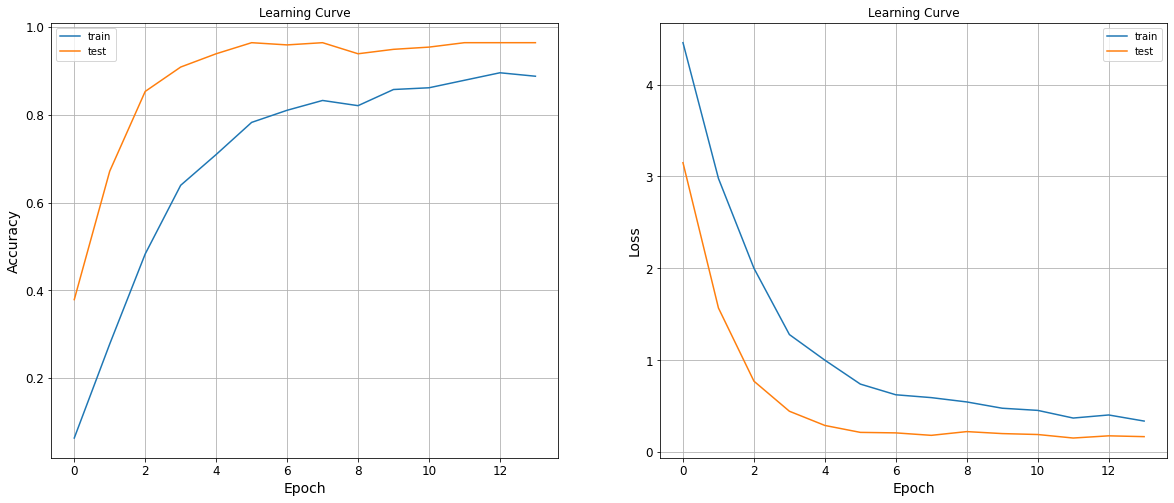

In [56]:
#Visualize learning curve
draw_learning_curve(history5)

In [57]:
#Summarize model 5 results
train_loss5, train_acc5 = model5.evaluate([train_img, features_train], train_target)
Model5 = "CNN Model 5 (Combined augmented features with adjusted parameters)"
row5 = [Model5, elapsed_time5, train_loss5, train_acc5, final_loss5, final_acc5]
results = results.append(pd.DataFrame([row5], columns=results.columns), ignore_index=True)

25/25 [==============================] - 3s 109ms/step - loss: 0.0042 - accuracy: 1.0000


In [58]:
results

,Model,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
0,CNN Model 1 (pre-processed features),0 days 00:07:47.458082,4.595515,0.010101,4.595514,0.010101
1,CNN Model 2 (Combined Features),0 days 00:58:27.762656,0.000137,1.000000,0.200161,0.959596
2,CNN Model 3 (Combined augmented features),0 days 00:13:02.141028,0.009873,1.000000,0.136852,0.974747
3,CNN Model 4 (Combined features with adjusted p...,0 days 00:11:55.753334,0.000044,1.000000,0.121783,0.984848
4,CNN Model 5 (Combined augmented features with ...,0 days 00:03:49.059120,0.004242,1.000000,0.169230,0.964646


## Because we are focussed on model accuracy, we will select CNN Model 4 (Combined features witj adjusted parameters)

In [59]:
# saving the model with less validation loss and more accuracy i.e. model 3 with combined features and data augmentation.
save_dir = "/results/"
model_name = 'keras_leaf_classifier_best.h5'
model_path = os.path.join(save_dir, model_name)
model4.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/keras_leaf_classifier_best.h5 


In [60]:
# predict the labels using model 3 with combined features and data augmentation.
y_pred = model4.predict([val_img, features_val])
y_pred.round(2)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
yPred = pd.DataFrame(y_pred, columns=le.classes_)

In [62]:
yPred

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,5.649465e-13,2.852405e-15,9.993575e-01,6.575557e-09,5.508727e-18,8.563787e-16,2.662874e-12,1.861702e-18,6.207819e-11,6.574458e-15,...,1.274968e-13,1.201468e-11,5.259989e-20,1.243285e-14,3.776816e-17,5.205194e-14,8.289457e-15,1.741599e-08,3.165551e-14,2.822059e-14
1,4.010326e-13,2.256030e-13,3.055987e-12,2.530248e-15,2.403235e-14,1.798654e-09,7.984268e-13,4.190504e-18,4.224514e-11,5.685222e-12,...,3.926390e-16,3.234992e-14,8.393103e-15,3.583973e-18,4.318862e-17,1.830062e-16,5.893616e-19,1.238077e-12,1.116882e-09,2.574047e-16
2,1.088578e-09,2.232828e-07,2.397745e-04,7.386223e-08,1.066772e-09,1.165360e-05,4.193773e-09,2.859113e-04,8.819062e-09,1.764311e-12,...,2.454335e-08,9.255268e-08,7.845781e-09,3.298859e-06,9.201578e-09,4.912157e-11,7.868237e-11,3.937722e-10,4.374955e-07,1.549234e-06
3,3.740968e-21,2.544348e-18,3.017760e-12,1.609055e-15,5.532173e-19,1.640303e-14,2.520447e-12,1.428150e-16,1.348147e-19,1.659180e-18,...,1.310288e-18,4.751730e-17,8.084776e-19,1.069133e-16,4.746355e-15,9.136207e-16,2.915737e-21,1.276750e-11,1.168691e-21,2.008584e-11
4,2.651581e-16,2.594496e-18,1.773458e-15,1.187696e-09,3.962674e-18,1.397923e-18,3.040797e-07,9.529010e-19,4.249312e-13,2.233737e-20,...,3.903010e-18,2.161221e-12,6.511810e-14,2.678250e-13,1.073223e-12,1.076220e-13,1.236005e-17,5.323936e-14,3.314419e-22,7.148593e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2.496008e-13,4.739771e-13,1.930298e-19,2.122943e-15,1.998330e-11,7.546804e-10,3.352110e-16,5.667199e-15,8.821797e-17,8.800525e-16,...,3.175363e-15,1.997830e-16,4.093195e-12,3.558211e-08,2.789897e-07,2.276390e-12,9.040320e-14,1.175086e-16,1.200244e-16,3.383101e-13
194,1.599722e-19,4.297952e-17,5.153264e-10,1.583240e-18,1.058211e-19,4.765532e-19,2.511848e-12,5.687916e-24,3.235225e-13,2.395012e-23,...,6.817907e-18,6.430203e-15,6.315927e-20,1.703633e-22,1.699632e-18,3.527221e-18,8.556867e-16,2.008747e-09,9.213678e-17,4.077587e-21
195,6.594180e-20,4.172836e-19,3.771861e-17,1.731327e-12,1.032571e-17,3.173945e-19,1.025396e-09,3.485391e-19,1.476794e-14,2.989853e-22,...,2.600651e-16,3.550701e-14,2.406949e-12,1.255109e-11,5.046406e-12,1.331019e-13,1.241012e-17,1.332249e-11,1.929400e-22,1.050642e-12
196,4.574490e-15,1.289217e-15,5.122945e-10,1.774616e-12,1.641254e-20,2.897782e-21,4.261130e-15,4.372817e-19,7.784918e-14,2.680119e-12,...,2.945377e-12,2.848294e-17,1.218420e-21,6.313009e-22,2.866929e-21,3.839872e-11,1.043308e-13,4.604955e-15,7.744316e-20,8.851617e-11


In [63]:
# Evaluate model accuracy, loss and error for model 3.
score = model4.evaluate([val_img, features_val], val_target)
print('Test loss: {}%'.format(score[0] * 100))
print('Test score: {}%'.format(score[1] * 100))

print("MLP Error: %.2f%%" % (100 - score[1] * 100))

7/7 [==============================] - 1s 96ms/step - loss: 0.1218 - accuracy: 0.9848
Test loss: 12.178308516740799%
Test score: 98.48484992980957%
MLP Error: 1.52%


## As indicated below--my CNN model using adjusted parameters yielded the highest test accuracy and lowest Test-Loss

In [64]:
#model summary sorted by validation loss.
results.set_index("Model", drop = True, inplace = True)
results.sort_values(by=['Test-loss'], ascending= True)

,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
Model,,,,,
CNN Model 4 (Combined features with adjusted parameters),0 days 00:11:55.753334,0.000044,1.000000,0.121783,0.984848
CNN Model 3 (Combined augmented features),0 days 00:13:02.141028,0.009873,1.000000,0.136852,0.974747
CNN Model 5 (Combined augmented features with adjusted parameters),0 days 00:03:49.059120,0.004242,1.000000,0.169230,0.964646
CNN Model 2 (Combined Features),0 days 00:58:27.762656,0.000137,1.000000,0.200161,0.959596
CNN Model 1 (pre-processed features),0 days 00:07:47.458082,4.595515,0.010101,4.595514,0.010101


## Drop 1st model, as it is heavily skewing results within the graphic

In [77]:
results = results.iloc[1:]

<AxesSubplot:title={'center':'Model Evaluation'}, xlabel='Model'>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'CNN Model 2 (Combined Features)'),
  Text(1, 0, 'CNN Model 3 (Combined augmented features)'),
  Text(2, 0, 'CNN Model 4 (Combined features with adjusted parameters)'),
  Text(3, 0, 'CNN Model 5 (Combined augmented features with adjusted parameters)')])

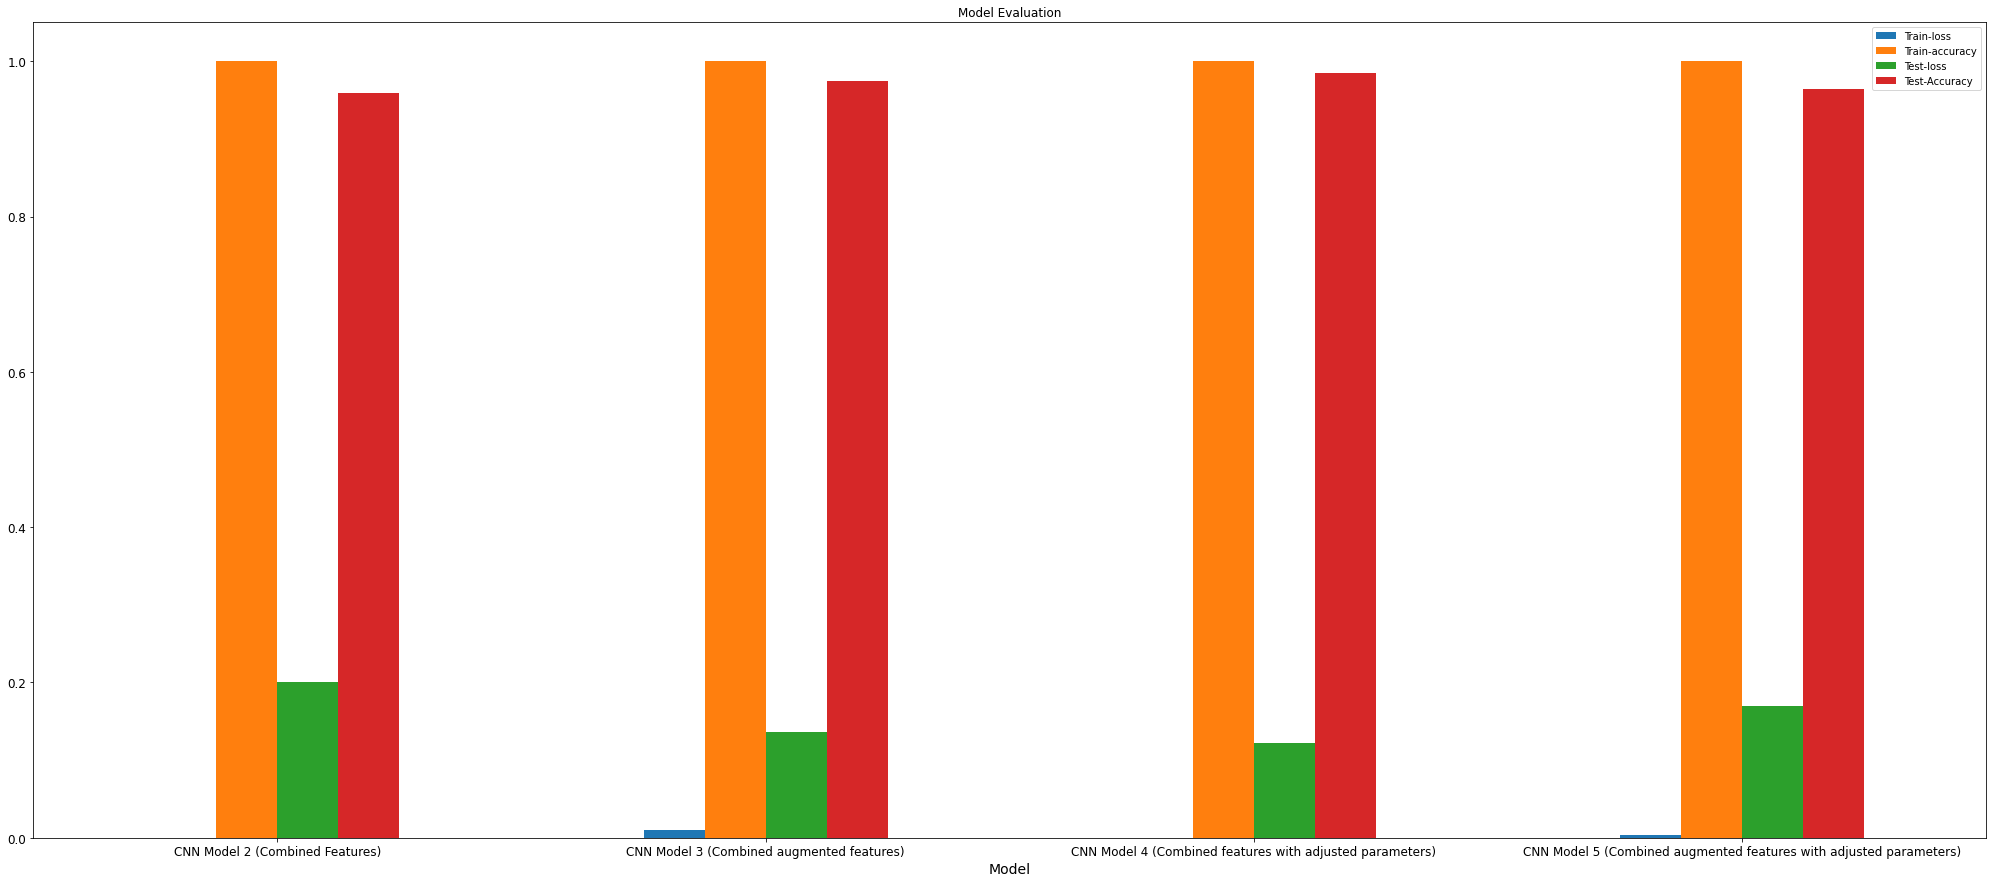

In [80]:
#visualize model results based on test and train loss and accuracy
results[['Train-loss','Train-accuracy', 'Test-loss', 'Test-Accuracy']].plot(kind='bar', title ="Model Evaluation", figsize=(35, 15))
plt.xticks(rotation='horizontal')

#### Submission (Evaluate the model on test set) for Kaggle

In [66]:
#Ids to act as an index for submission dataframe
testIds = df_test.pop('id')
# standardize the data by setting the mean to 0 and std to 1
features_test = StandardScaler().fit(df_test).transform(df_test)

In [67]:
print('Test predictions...')
#model 4 prediction
preds = model4.predict([test_images,features_test])

# dataframe based on id as index and different species as columns which can be read from labelencoder classes.
submission = pd.DataFrame(preds,index=testIds,columns=le.classes_)

#save submission results to csv
submission.to_csv('Leaf_Keras_CNN_combined_features_adjusted.csv')

Test predictions...


In [68]:
print('Test Model 1 predictions...')
#model 1 prediction
preds = model1.predict(test_images)
# dataframe based on id as index and different species as columns which can be read from labelencoder classes.
submission = pd.DataFrame(preds,index=testIds,columns=le.classes_)
#save submission results to csv
submission.to_csv('Leaf_Keras_CNN_preextracted_features.csv')

Test Model 1 predictions...


In [69]:
print('Test Model 2 predictions...')
#model 2 prediction
preds = model2.predict([test_images,features_test])
# dataframe based on id as index and different species as columns which can be read from labelencoder classes.
submission = pd.DataFrame(preds,index=testIds,columns=le.classes_)
#save submission results to csv
submission.to_csv('Leaf_Keras_CNN_combined_features.csv')

Test Model 2 predictions...


In [70]:
print('Test Model 3 predictions...')
#model 3 prediction
preds = model3.predict([test_images,features_test])

# dataframe based on id as index and different species as columns which can be read from labelencoder classes.
submission = pd.DataFrame(preds,index=testIds,columns=le.classes_)

#save submission results to csv
submission.to_csv('Leaf_Keras_CNN_imagegen.csv')

Test Model 3 predictions...


In [71]:
print('Test Model 5 predictions...')
#model 5 prediction
preds = model5.predict([test_images,features_test])

# dataframe based on id as index and different species as columns which can be read from labelencoder classes.
submission = pd.DataFrame(preds,index=testIds,columns=le.classes_)

#save submission results to csv
submission.to_csv('Leaf_Keras_CNN_imagegen.csv')

Test Model 5 predictions...


Management Problem : 
Assume that we are providing advice to a website provider who is looking for tools to automatically label images provided by end users. As we look across the factors in the study, making recommendations to management about image classification, we are most concerned about achieving the highest possible accuracy in image classification. That is, we should be willing to sacrifice training time for model accuracy. What type of machine learning model works best? If it is a convolutional neural network, what type of network should we use? Part of this recommendation may concern information about the initial images themselves (input data for the classification task). What types of images work best ?


#### REPORT/FINDINGS: 
(1) A summary and problem definition for management; 

(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

(3) Overview of programming work; 

(4) Review of results with recommendations for management.



### (1) A summary and problem definition for management

Per the briefing, we are providing advice to a website provider who is looking for tools to automatically label images provided by end users. The goal here is to optimize accuracy above all else, which simplifies things because we do not need to balance accuracy with processing speed. To optimize accuracy we will employ a number of different models to test a number of parameters, features, and layers. We will also attempt to determine what types of images are best-suited for input into said models. Once we have identified an optimal model, we will save it to test against test images to determine how well our selected model is performing. This problem involves trial and error with different optimizer parameters, epochs, activation layers, and model types.

### (2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed

We first need to load the dataset and ensure there are no missing values and the data itself is evenly distributed across the different species and clean. We then adjust image components, including value regularization and filtering to detect edges. Preprocessing also includes encoding of labels categorically, incorporating cross-validation functionality, reshaping the dataset into a single channel, and one hot encoding target values.

Once we have completed preprocessing, we begin to employ a number of different models. The models tested include a CNN model with preprocessed images (1 feature), a CNN model with 2 input features, a CNN model that takes the second model and adds augmented features, and a model that I included which takes best practices from the first 3 models and attempts to add a number of new parameters to improve accuracy. The analysis of each model includes looking at the train/test loss and accuracy, with a focus on the accuracy achieved.

### (3) Overview of programming work

I started by taking model 2 (combined features) and adjusted a number of parameters in an attempt to improve accuracy. I first attempted to improve the Adam optimizer by adjusting the learning rate and include beta values, an epsilon adjustment, and setting amsgrad to false. I then attempted adjusting the activation types, eventually landing on the adjustment of the second activation layer, changing it from relu to tanh. After making adjustments to some of the model parameters, I then adjusted the number of epochs to see if that could improve accuracy, choosing 50 epochs for my adjusted model. After making these adjustments to model 2, I found that I was able to achieve a slightly higher accuracy rating. Once I applied the new parameters to the original model, I also attempted a model with combined augmented features using the new parameters. Surprisingly, this performed slightly worse than the original augmented model. After all adjustments, model 4 (my combined features model) proved to have the highest test accuracy at 98.5% and lowest test loss at 12%. 

### (4) Review of results with recommendations for management

After testing the original models and making updates employed on two new models, I found the model with combined features and adjusted parameters (model 4) to yield the highest test accuracy, which was the primary metric of interest for this study. Because this had 50 epochs instead of 100 epochs, it also had a significantly faster run time than the original model using combined features. Because we are only concerned with accuracy, I would recommend taking the best model from testing, employing it to a new dataset and adjusting as needed with an emphasis on accuracy. When looking at input data, I found the current preprocessing steps to improve model accuracy significantly. This includes reshaping the dataset, employing one-hot encoding, filtering to detect edges within images, and employing value regularization. 